In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

/Users/James/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [6]:
x_train = x_train.reshape(60000, 28,28,1)
x_test= x_test.reshape(10000, 28, 28, 1)

In [7]:
from keras.utils import  np_utils

In [8]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [155]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta

In [174]:
model= Sequential()#開啟空的神經網路

In [175]:
model.add(Conv2D(32,(3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('tanh'))

In [176]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [177]:
model.add(Dropout(0.28))

In [178]:
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('tanh'))

In [179]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [180]:
model.add(Dropout(0.28))

In [181]:
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('tanh'))

In [182]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [183]:
model.add(Dropout(0.28))

In [184]:
model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('tanh'))

In [185]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [186]:
model.add(Dropout(0.28))

In [187]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('tanh'))

In [188]:
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [203]:
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.3),metrics=['accuracy'])

In [204]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_51 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_52 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)          0         
__________

In [205]:
model.fit(x_train, y_train, batch_size=70, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1065 - acc: 0.9756
Epoch 2/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0849 - acc: 0.9807
Epoch 3/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0718 - acc: 0.9828
Epoch 4/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0648 - acc: 0.9844
Epoch 5/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0558 - acc: 0.9863
Epoch 6/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0516 - acc: 0.9873
Epoch 7/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0462 - acc: 0.9885
Epoch 8/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0419 - acc: 0.9892
Epoch 9/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0404 - acc: 0.9894
Epoch 10/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0390 - acc: 0.9901

In [206]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 319us/step


In [207]:
print('loss: ', score[0])
print('acc: ',score[1])

loss:  0.019543508721888064
acc:  0.9941


In [208]:
model_json= model.to_json()
open('handwriting_model_CNN.json2','w').write(model_json)
model.save_weights('handwriting_weights_cnn2.h5')

In [209]:
predict = model.predict_classes(x_test)

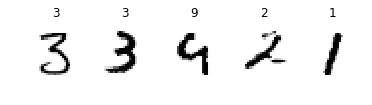

In [210]:
pick = np.random.randint(1,9999,5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')